In [16]:
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tkinter
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import GridSearchCV
import pickle
from sklearn.preprocessing import PowerTransformer ,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metric
import missingno as msno



In [ ]:
# reading input file
df = pd.read_csv('CE802_P2_Data/CE802_P2_Data.csv')

<AxesSubplot: >

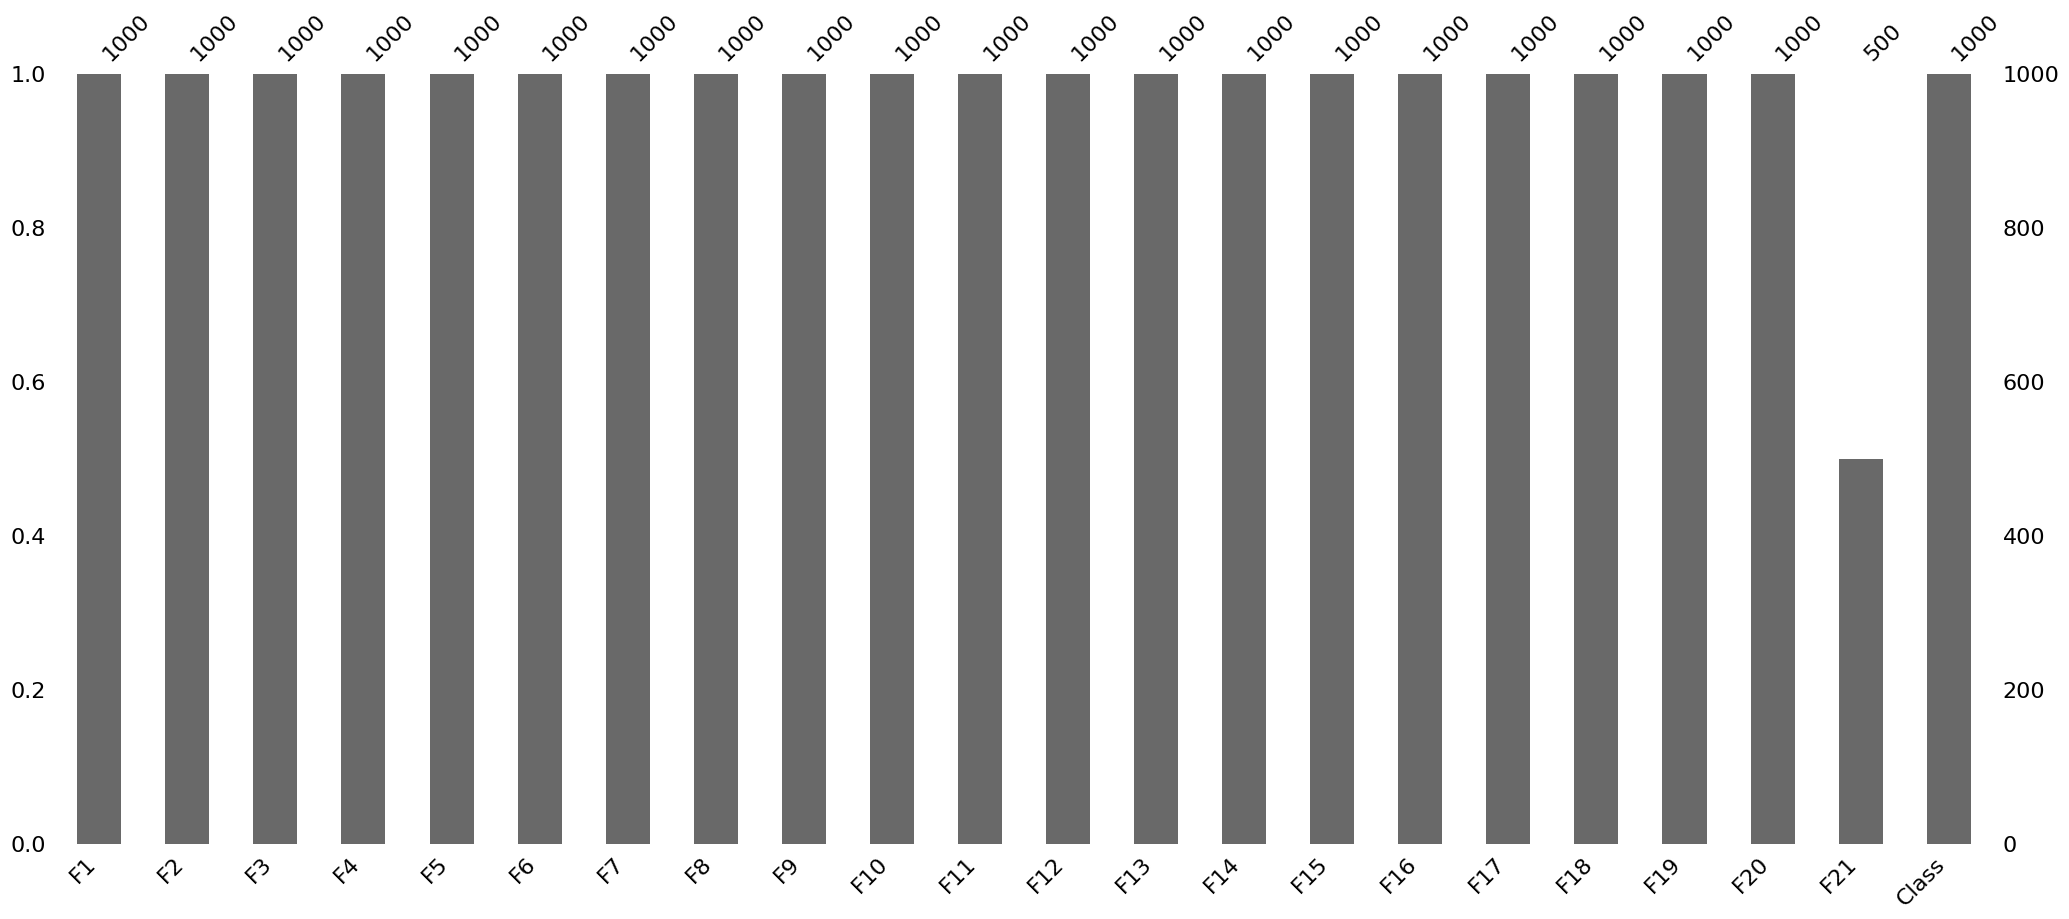

In [2]:
#checking for missing values
msno.bar(df)


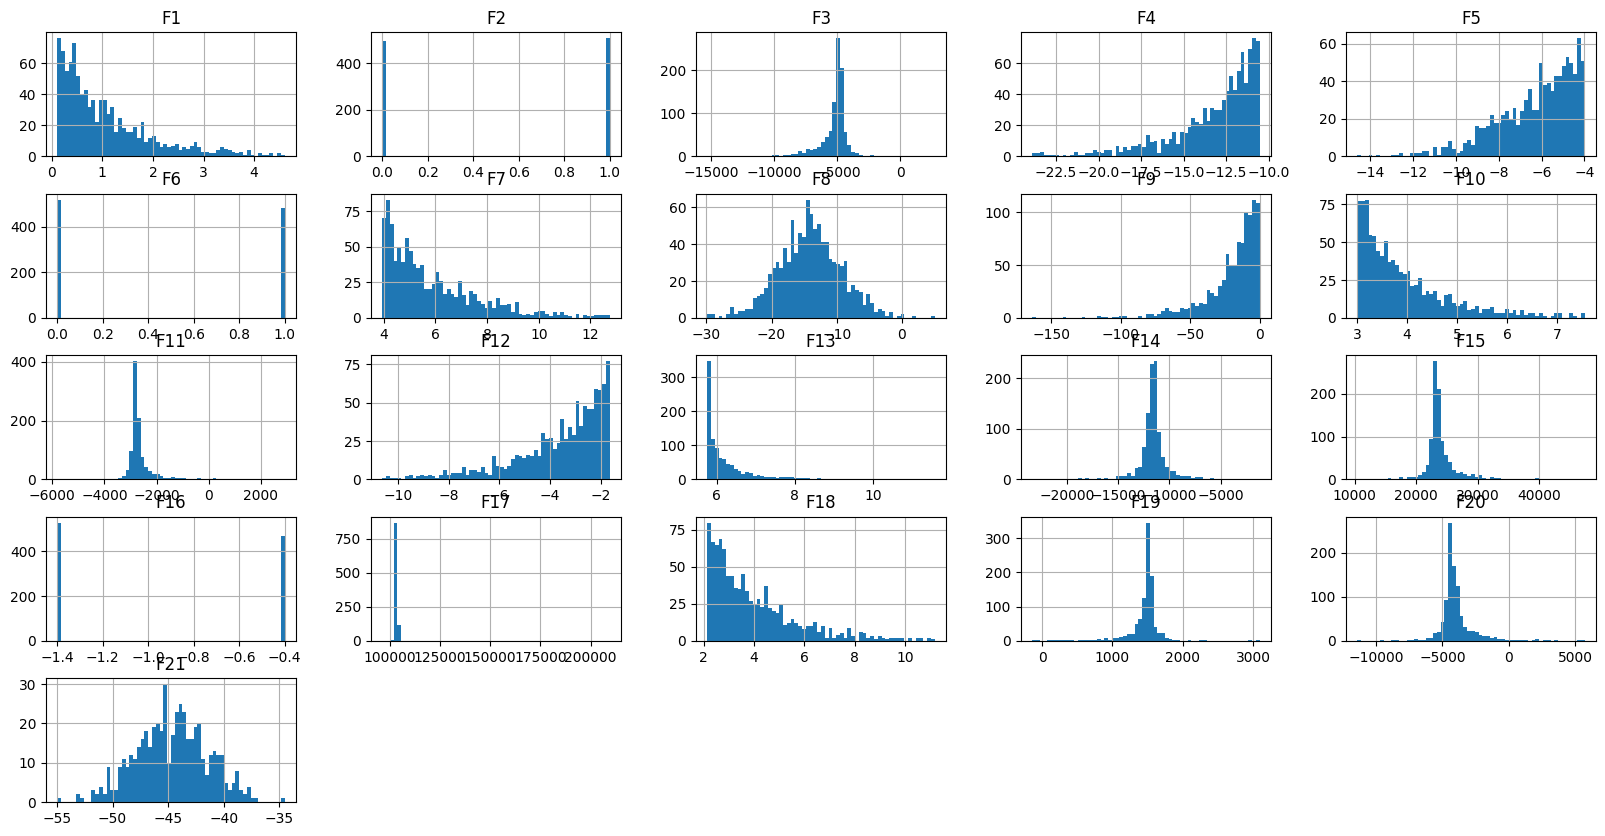

In [3]:
# checking data distribution
ax = df.hist(figsize=(20,10),bins=60)
plt.show()

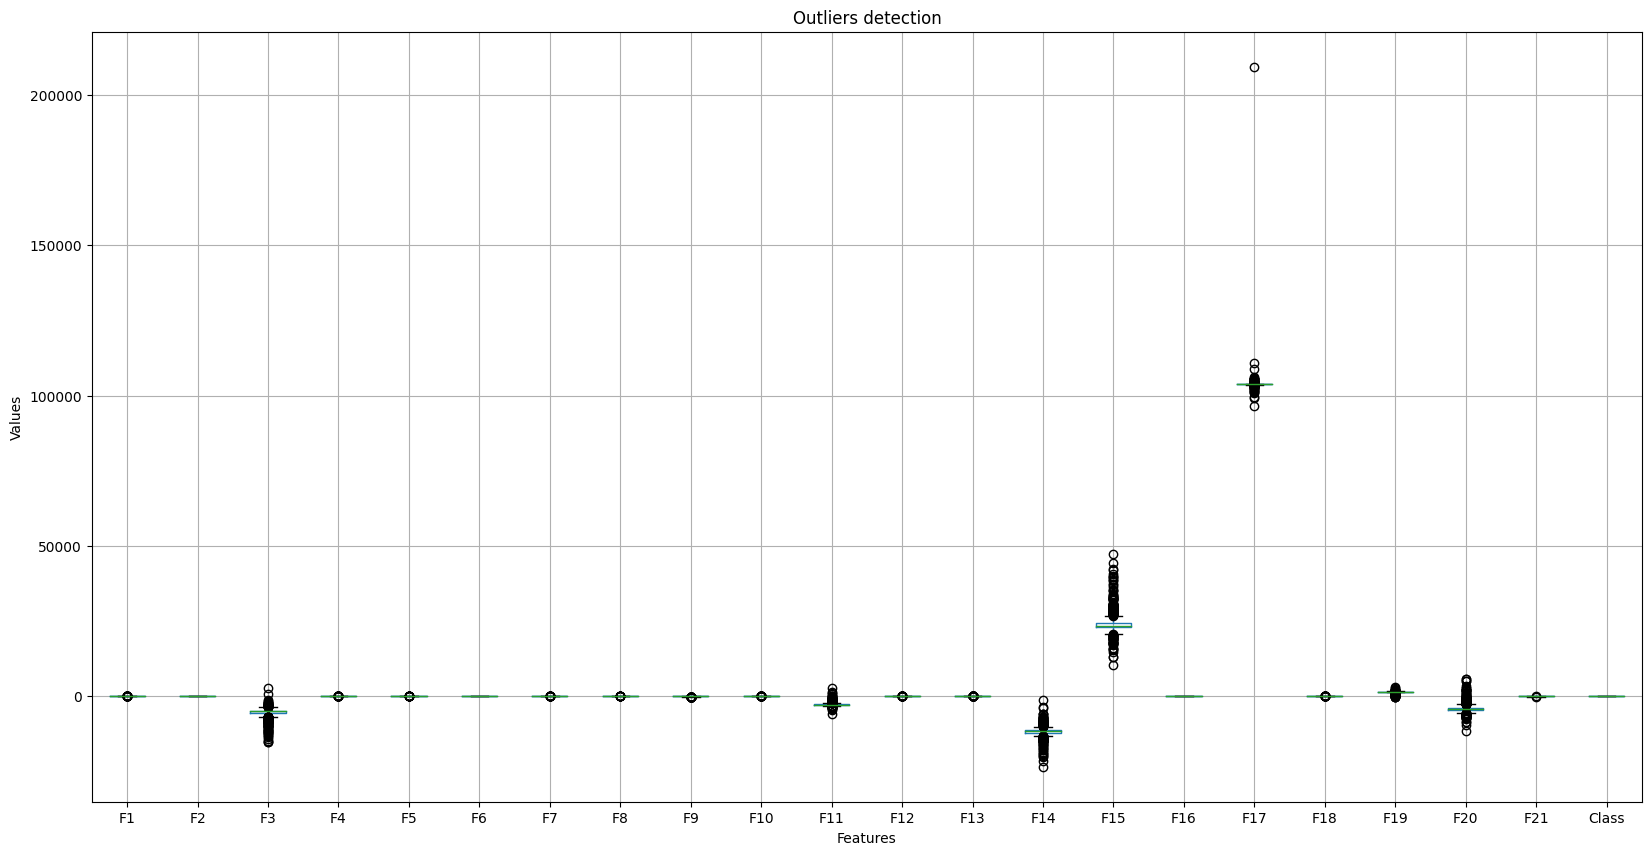

In [4]:
# checking for outliers
ax = df.boxplot(figsize=(20,10))
ax.set_xlabel('Features')
ax.set_ylabel('Values')
ax.set_title('Outliers detection')
plt.savefig("plots/outliers.png")

In [5]:
# checking uniqueness in data
df.nunique()

F1       946
F2         2
F3       976
F4       948
F5       943
F6         2
F7       942
F8       982
F9       947
F10      951
F11      983
F12      955
F13      973
F14      980
F15      973
F16        2
F17      975
F18      936
F19      979
F20      974
F21      294
Class      2
dtype: int64

In [6]:
#dropping F21 because 50% of the data is missing
df = df.drop(['F21'],axis=1)

In [7]:
# squaring the column to remove skewness
df['F3'] = np.square(df['F3'])

In [8]:
# checking for skewness in data before power transform
df.skew(skipna = True)

F1        1.409531
F2       -0.028045
F3        4.744796
F4       -1.534271
F5       -1.066796
F6        0.076169
F7        1.309206
F8        0.038875
F9       -2.149838
F10       1.496661
F11       3.536176
F12      -1.327683
F13       2.643845
F14      -0.810363
F15       2.418307
F16       0.116370
F17      30.538670
F18       1.483233
F19      -2.293913
F20       2.262716
Class    -0.024038
dtype: float64

In [9]:
# transforming skewed data with PowerTransform
pt = PowerTransformer(method='yeo-johnson')

f1 = np.array(df['F1'])
f3 = np.array(df['F3'])
f4 = np.array(df['F4'])
f5 = np.array(df['F5'])
f7 = np.array(df['F7'])
f9 = np.array(df['F9'])
f10 = np.array(df['F10'])
f11 = np.array(df['F11'])
f12 = np.array(df['F12'])
f13 = np.array(df['F13'])
f14 = np.array(df['F14'])
f15 = np.array(df['F15'])
f17 = np.array(df['F17'])
f18 = np.array(df['F18'])
f19 = np.array(df['F19'])
f20 = np.array(df['F20'])
reshaped_f1 = np.array(f1).reshape(-1, 1)
reshaped_f3 = np.array(f3).reshape(-1, 1)
reshaped_f4 = np.array(f4).reshape(-1, 1)
reshaped_f5 = np.array(f5).reshape(-1, 1)
reshaped_f7 = np.array(f7).reshape(-1, 1)
reshaped_f9 = np.array(f9).reshape(-1, 1)
reshaped_f10 = np.array(f10).reshape(-1, 1)
reshaped_f11 = np.array(f11).reshape(-1, 1)
reshaped_f12 = np.array(f12).reshape(-1, 1)
reshaped_f13 = np.array(f13).reshape(-1, 1)
reshaped_f14 = np.array(f14).reshape(-1, 1)
reshaped_f15 = np.array(f15).reshape(-1, 1)
reshaped_f17 = np.array(f17).reshape(-1, 1)
reshaped_f18 = np.array(f18).reshape(-1, 1)
reshaped_f19 = np.array(f19).reshape(-1, 1)
reshaped_f20 = np.array(f20).reshape(-1, 1)
df['F1'] = pt.fit_transform(reshaped_f1)
df['F3'] = pt.fit_transform(reshaped_f3)
df['F4'] = pt.fit_transform(reshaped_f4)
df['F5'] = pt.fit_transform(reshaped_f5)
df['F7'] = pt.fit_transform(reshaped_f7)
df['F9'] = pt.fit_transform(reshaped_f9)
df['F10'] = pt.fit_transform(reshaped_f10)
df['F11'] = pt.fit_transform(reshaped_f11)
df['F12'] = pt.fit_transform(reshaped_f12)
df['F13'] = pt.fit_transform(reshaped_f13)
df['F14'] = pt.fit_transform(reshaped_f14)
df['F15'] = pt.fit_transform(reshaped_f15)
df['F17'] = pt.fit_transform(reshaped_f17)
df['F18'] = pt.fit_transform(reshaped_f18)
df['F19'] = pt.fit_transform(reshaped_f19)
df['F20'] = pt.fit_transform(reshaped_f20)

In [10]:
# checking for skewness in data after power transform
df.skew(skipna = True)

F1       0.119475
F2      -0.028045
F3      -0.061625
F4      -0.198928
F5      -0.083797
F6       0.076169
F7       0.161846
F8       0.038875
F9       0.018137
F10      0.207924
F11      0.043468
F12     -0.108477
F13      0.464509
F14     -0.611384
F15     -0.187825
F16      0.116370
F17      0.000000
F18      0.141155
F19      0.809338
F20      0.314830
Class   -0.024038
dtype: float64

In [21]:
# removing outliers

#function to remove outlires using IQR
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.05)
    q3 = df_in[col_name].quantile(0.95)
    iqr = q3-q1
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

df = remove_outlier(df, 'F3')
df = remove_outlier(df, 'F11')
df = remove_outlier(df, 'F15')
df = remove_outlier(df, 'F14')
df = remove_outlier(df, 'F19')
df = remove_outlier(df, 'F20')

<AxesSubplot: >

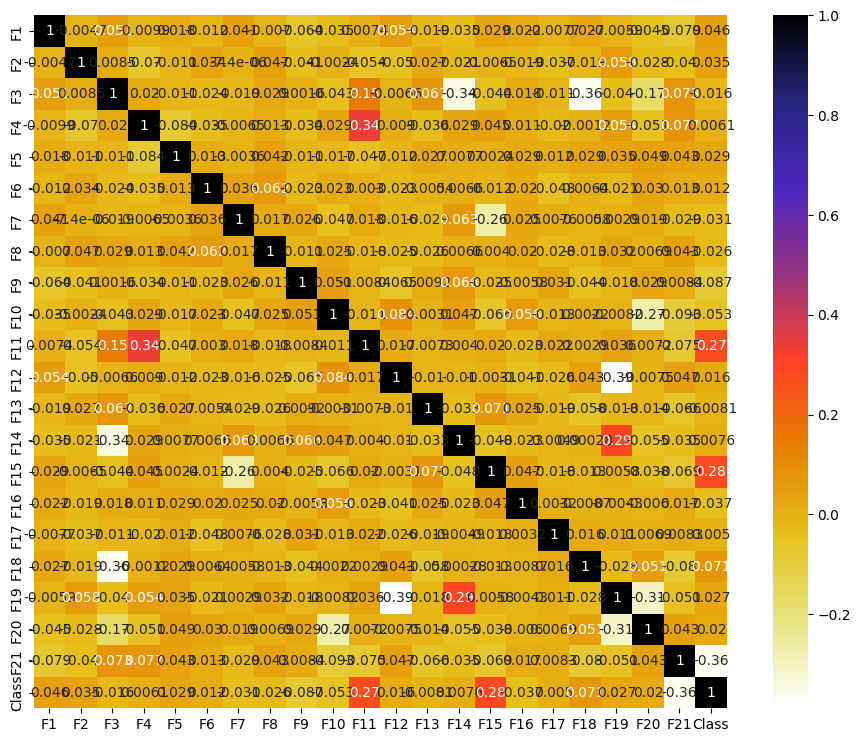

In [806]:
# checking for correlation
corrmat = df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,annot=True, square=True, cmap=plt.cm.CMRmap_r)

In [22]:

# mapping boolean to 0/1
df["Class"] = df["Class"].astype(int)

# seperating features and output
X = df.iloc[:, 0:20]
y = df.iloc[:, 20]
# splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 50, test_size = 0.3)


In [808]:
# comparing multiple models
estimators = {
    'RandomForest': RandomForestClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'Svm':SVC(kernel = 'linear', random_state = 0),
    'Knn': KNeighborsClassifier(n_neighbors=2),
    'LogisticRegression': LogisticRegression(max_iter = 1000, random_state=0)

}

# fitting models and checking their accuracy 
for name, estimator in estimators.items():
        print(name)
        estimator.fit(X_train, y_train)
        y_pred = estimator.predict(X_test)
        print(f'The accuracy score is: {metric.accuracy_score(y_test, y_pred):.4f}')
        print(f'The report is: {metric.classification_report(y_test, y_pred)}')
        print('#'*100)

RandomForest
The accuracy score is: 0.8682
The report is:               precision    recall  f1-score   support

           0       0.87      0.87      0.87       149
           1       0.87      0.86      0.87       147

    accuracy                           0.87       296
   macro avg       0.87      0.87      0.87       296
weighted avg       0.87      0.87      0.87       296

####################################################################################################
DecisionTree
The accuracy score is: 0.8277
The report is:               precision    recall  f1-score   support

           0       0.80      0.87      0.84       149
           1       0.86      0.78      0.82       147

    accuracy                           0.83       296
   macro avg       0.83      0.83      0.83       296
weighted avg       0.83      0.83      0.83       296

####################################################################################################
Svm
The accuracy score is: 0

In [835]:
# grid sirching descision tree for increase accuracy(Hyper parameter tuning)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
tree_param = {'max_features': ['sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],'criterion':['gini','entropy'],
              'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150,200,250]}

dtree = DecisionTreeClassifier()
clf = GridSearchCV(dtree, tree_param)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(f'The accuracy score is: {metric.accuracy_score(y_test, y_pred):.4f}')
print(f'The report is: {metric.classification_report(y_test, y_pred)}')

The accuracy score is: 0.7432
The report is:               precision    recall  f1-score   support

           0       0.75      0.73      0.74       149
           1       0.74      0.76      0.74       147

    accuracy                           0.74       296
   macro avg       0.74      0.74      0.74       296
weighted avg       0.74      0.74      0.74       296



In [833]:
clf.best_params_

{'ccp_alpha': 0.01,
 'criterion': 'entropy',
 'max_depth': 30,
 'max_features': 'log2'}

In [874]:
# grid sirching Random forest classifier for increase accuracy (Hyper parameter tuning)

params = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['sqrt', 'log2'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'ccp_alpha': [0.1, .01, .001],'criterion':['gini','entropy'],
 'n_estimators': [ 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
#n_estimators 
rfc = RandomForestClassifier()
clf = GridSearchCV(rfc, params)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(f'The accuracy score is: {metric.accuracy_score(y_test, y_pred):.4f}')
print(f'The report is: {metric.classification_report(y_test, y_pred)}')

KeyboardInterrupt: 

In [842]:
# get optimal parameters
clf.best_params_

{'bootstrap': False,
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 1200}

random forest optimal features: 

{'bootstrap': False,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 1600}

In [884]:
#Training optimal model with best obtained parameters

rfc = RandomForestClassifier(n_estimators=1600,bootstrap=False,max_depth=20,max_features='sqrt',min_samples_leaf=2,min_samples_split=10)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
print(f'The accuracy score is: {metric.accuracy_score(y_test, y_pred):.4f}')
print(f'The report is: {metric.classification_report(y_test, y_pred)}')
# pickle.dump(rfc, open('prob1RandomForest', "wb"))

The accuracy score is: 0.9122
The report is:               precision    recall  f1-score   support

           0       0.93      0.89      0.91       149
           1       0.90      0.93      0.91       147

    accuracy                           0.91       296
   macro avg       0.91      0.91      0.91       296
weighted avg       0.91      0.91      0.91       296



In [886]:
# HERE YOU WILL USE THIS TEMPLATE TO SAVE THE PREDICTIONS ON THE TEST SET
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PowerTransformer 
import pickle

# Load the test data
test_df = pd.read_csv('CE802_P2_Test.csv')

# Make sure you work on a copy
test_data = test_df.iloc[:, 0:20].copy()


# test_data['F21'] = test_data['F21'].fillna(test_data['F21'].median())

test_data['F3'] = np.square(test_data['F3'])

pt = PowerTransformer(method='yeo-johnson')

#f8 needs normalization
f1 = np.array(test_data['F1'])
f3 = np.array(test_data['F3'])
f4 = np.array(test_data['F4'])
f5 = np.array(test_data['F5'])
f7 = np.array(test_data['F7'])
f9 = np.array(test_data['F9'])
f10 = np.array(test_data['F10'])
f11 = np.array(test_data['F11'])
f12 = np.array(test_data['F12'])
f13 = np.array(test_data['F13'])
f14 = np.array(test_data['F14'])
f15 = np.array(test_data['F15'])
f17 = np.array(test_data['F17'])
f18 = np.array(test_data['F18'])
f19 = np.array(test_data['F19'])
f20 = np.array(test_data['F20'])
reshaped_f1 = np.array(f1).reshape(-1, 1)
reshaped_f3 = np.array(f3).reshape(-1, 1)
reshaped_f4 = np.array(f4).reshape(-1, 1)
reshaped_f5 = np.array(f5).reshape(-1, 1)
reshaped_f7 = np.array(f7).reshape(-1, 1)
reshaped_f9 = np.array(f9).reshape(-1, 1)
reshaped_f10 = np.array(f10).reshape(-1, 1)
reshaped_f11 = np.array(f11).reshape(-1, 1)
reshaped_f12 = np.array(f12).reshape(-1, 1)
reshaped_f13 = np.array(f13).reshape(-1, 1)
reshaped_f14 = np.array(f14).reshape(-1, 1)
reshaped_f15 = np.array(f15).reshape(-1, 1)
reshaped_f17 = np.array(f17).reshape(-1, 1)
reshaped_f18 = np.array(f18).reshape(-1, 1)
reshaped_f19 = np.array(f19).reshape(-1, 1)
reshaped_f20 = np.array(f20).reshape(-1, 1)
test_data['F1'] = pt.fit_transform(reshaped_f1)
test_data['F3'] = pt.fit_transform(reshaped_f3)
test_data['F4'] = pt.fit_transform(reshaped_f4)
test_data['F5'] = pt.fit_transform(reshaped_f5)
test_data['F7'] = pt.fit_transform(reshaped_f7)
test_data['F9'] = pt.fit_transform(reshaped_f9)
test_data['F10'] = pt.fit_transform(reshaped_f10)
test_data['F11'] = pt.fit_transform(reshaped_f11)
test_data['F12'] = pt.fit_transform(reshaped_f12)
test_data['F13'] = pt.fit_transform(reshaped_f13)
test_data['F14'] = pt.fit_transform(reshaped_f14)
test_data['F15'] = pt.fit_transform(reshaped_f15)
test_data['F17'] = pt.fit_transform(reshaped_f17)
test_data['F18'] = pt.fit_transform(reshaped_f18)
test_data['F19'] = pt.fit_transform(reshaped_f19)
test_data['F20'] = pt.fit_transform(reshaped_f20)

# rfc = pickle.load(open('prob1RandomForest', "rb"))


predicted = rfc.predict(test_data)
... # CHANGE HERE -- use your previously trained predictor and apply it to test_data
                # (test_data can be modified if needed but make sure you don't change the order of the rows)...

# Replace the last (empty) column with your prediction
test_df.iloc[:,-1] = predicted.astype(bool)

# Save to the destination file
test_df.to_csv('CE802_P2_Test_Predictions.csv', index=False, float_format='%.8g')

# IMPORTANT!! Make sure only the last column has changed
assert pd.read_csv('CE802_P2_Test.csv').iloc[:,:-1].equals(pd.read_csv('CE802_P2_Test_Predictions.csv').iloc[:,:-1])